In [1]:
#import delle librerie
import pandas as pd
import numpy as np
import time
from matplotlib import dates
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser
import dateutil.parser as dp
import seaborn as sns
import statistics
import networkx as nx
import matplotlib.ticker as mticker
from sklearn.linear_model import LinearRegression
from scipy import stats
import math
from collections import Counter
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [2]:
def get_subdf(df, cond):
    import datetime
    df['time'] =  pd.to_datetime(df['time'],utc=True)
    if cond == 2:
        df['type'] = np.where((df.time.dt.time > datetime.time(9, 58, 10)), 'ok', 'no')
    if cond == 1:
        df['type'] = np.where((df.time.dt.time < datetime.time(9, 49, 10)), 'ok', 'no')
    df = df.sort_values(by="time")
    sub = df.loc[df['type'] == "ok"]
    sub = sub[sub.rssi < -20]
    return sub

In [3]:
def setNonZero(number):
    if number == 0:
        return 1

In [4]:
def tests_with_pvalue2(df1,df2):
    
    rssiA = df1.rssi
    rssiB = df2.rssi
    
    rssi3 = [*rssiA,*rssiB]
        
    minTot = min(rssi3)
    maxTot = max(rssi3)
    
    print(ttest_ind(rssiA, rssiB), flush=True)
    
    
    #trovo le distribuzioni a partire da quelle liste di RSSI
    l = list(range(minTot-1,maxTot+1))
    distribA = dict()
    distribB = dict()

    
    for e in l:
        distribA[e] = 0
        distribB[e] = 0
    
    for elem in rssiA:
        distribA[elem] += 1
    
    for elem in rssiB:
        distribB[elem] += 1
        
    
    
    
    
    #confronto grafico distribuzioni di RSSI
    plt.figure(figsize=(7,6))
    plt.title('Confronto distribuzioni Avanti e Lato')
    plt.xlabel('RSSI [dB]')
    plt.ylabel('Frequency')
    plt.bar(distribA.keys(), distribA.values(), 1, color='lightcoral')
    plt.bar(distribB.keys(), distribB.values(), 1, color='cornflowerblue')
    plt.show()
    
    
    

In [5]:
def anal_half(f, scanner, advertiser):
    np.set_printoptions(suppress=True)
    dati = pd.read_csv(f+".csv")
    df = pd.DataFrame(dati)
    df['time'] = df['time'].apply(unixtimestamp)
    half_df = len(df) // 2
    df_1 = df.iloc[:half_df-25,:]
    df_1 = df_1.loc[(df_1['scanner']==scanner)&(df_1['advertiser']==advertiser)].dropna()
    df_2 = df.iloc[half_df+25:,:]
    df_2 = df_2.loc[(df_2['scanner']==scanner)&(df_2['advertiser']==advertiser)].dropna()
    files = [df_1, df_2] #qui dentro ci sono le due metà, corrispondenti a tasca/collo
    datasets = list()
    for df in files:         
        el = elaborate_dataset(df)
        datasets.append(el)
    rssiA = datasets[0].rssi
    rssiA = [i for i in rssiA if i < -20]
    rssiB = datasets[1].rssi
    rssiB = [i for i in rssiB if i < -20]

    rssi3 = [*rssiA,*rssiB]

    minTot = min(rssi3)
    maxTot = max(rssi3)

    print(ttest_ind(rssiA, rssiB), flush=True)


    #trovo le distribuzioni a partire da quelle liste di RSSI
    l = list(range(minTot-1,maxTot+1))
    distribA = dict()
    distribB = dict()


    for e in l:
        distribA[e] = 0
        distribB[e] = 0

    for elem in rssiA:
        distribA[elem] += 1

    for elem in rssiB:
        distribB[elem] += 1





    #confronto grafico distribuzioni di RSSI
    plt.figure(figsize=(9,8))
    plt.title('Confronto distribuzioni tasca - collo')
    plt.xlabel('RSSI [dB]')
    plt.ylabel('Frequency')
    plt.bar(distribA.keys(), distribA.values(), 1, color='lightcoral')
    plt.bar(distribB.keys(), distribB.values(), 1, color='cornflowerblue')
    plt.show()

In [6]:
def tests_with_pvalue():
    files = ["poc_casa_2m","poc_casa_3m"]
    
    datasets = list()
    for file in files:    
        couples = decouple_file(file)
        for c in couples:
            #print(c.describe(), flush=True)
            #z = elaborate_dataset(c)
            datasets.append(c)
    print("------------------------", flush=True)
    #print(datasets[0])
    print("------------------------")
    #print(datasets[3])
    
    
    #I miei dataset di riferimento sono il primo e l'ultimo, ovvero le popolazioni che hanno come scanner lo xiaomi
    #che vede l'LG, prima a 1m, poi a 2m. Quello che voglio fare è il t-test per vedere il p-value.
    #L'ipotesi è che le popolazioni siano diverse
    
    #datasets[0] = datasets[0][datasets[0].rssi == 7.0]
    #datasets[3] = datasets[3][datasets[3].rssi == 7.0]
    
    print(datasets[0].describe(), flush=True)
    print("------------------------", flush=True)
    print(datasets[3].describe(), flush=True)
    print("------------------------", flush=True)
    
    rssiA = datasets[0].rssi
    rssiB = datasets[3].rssi
    
    rssi3 = [*rssiA,*rssiB]
        
    minTot = min(rssi3)
    maxTot = max(rssi3)
    
    print(ttest_ind(rssiA, rssiB), flush=True)
    
    
    #trovo le distribuzioni a partire da quelle liste di RSSI
    l = list(range(minTot-1,maxTot+1))
    distribA = dict()
    distribB = dict()

    
    for e in l:
        distribA[e] = 0
        distribB[e] = 0
    
    for elem in rssiA:
        distribA[elem] += 1
    
    for elem in rssiB:
        distribB[elem] += 1
        
    
    
    
    
    #confronto grafico distribuzioni di RSSI
    plt.figure(figsize=(7,6))
    plt.title('Confronto distribuzioni a 2m e 3m')
    plt.xlabel('RSSI [dB]')
    plt.ylabel('Frequency')
    plt.bar(distribA.keys(), distribA.values(), 1, color='lightcoral')
    plt.bar(distribB.keys(), distribB.values(), 1, color='cornflowerblue')
    plt.show()
    
    
    

In [7]:
# funzione che prende due liste rappresentanti coppie (x,y) e le elabora in modo da
# togliere i punti che hanno stessa x ma diversa y. la reduce è sempre la funzione mediana
def clean_data(a: list,b: list):
    struc = dict()
    r1 = list()
    r2 = list()
    for i in range(len(a)):
        struc[a[i]] = list()
        struc[b[i]] = list()
    for j in range(len(a)):
        x = struc[a[j]]
        x.append(b[j])
        struc[a[j]] = x
    struc2 = {k:v for k,v in struc.items() if len(v) != 0}
    for key in struc2:
        r1.append(key)
        # reduce di tutte le y multiple ad una sola che è la mediana
        r2.append(statistics.mode(struc[key]))
        
    
    return [r1,r2]
        

In [8]:
#funzione che prende un dataset e ne grafica l'andamento RSSI e numero samples nel tempo
def create_linear_rssi_samples_vs_time_graph(d):
    d = d[d.rssi < -20]
    a = d['rssi']
    m = list(d['scanner'])
    if len(m) == 0:
        return
    scanner = str(list(d['scanner'])[0]) 
    adv = str(list(d['advertiser'])[0]) 
    dfa = pd.DataFrame({"Tempo" : list(d['time']),
                   "RSSI"  : list(a), "samples" : list(d['samples'])})
    # change the figure size
    plt.figure(figsize=(15,5))
    sns.set_context("notebook", font_scale=1.3)
    sns.set_theme(style="whitegrid", palette="pastel")
    dfa.Tempo = pd.to_datetime(dfa.Tempo)
    ax = sns.lineplot(x='Tempo',y='RSSI',data=dfa, marker="o")
    plt.title('Rssi di ' + scanner + " " + adv)
    #ax.set(xticks=dfa.Date.values)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
    #plt.xticks(rotation=60)
    plt.xlabel('Timestamp')
    plt.ylabel('RSSI [dB]')
    plt.show()
    plt.figure(figsize=(15,5))
    sns.set_context("notebook", font_scale=1.3)
    sns.set_theme(style="white", palette="pastel")
    bx = sns.lineplot(x='Tempo',y='samples',data=dfa, marker="o", color='orange', linewidth=2.5)
    plt.title('Numero campioni di ' + scanner)
    #bx.set(xticks=dfa.Date.values)
    bx.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
    plt.xticks(rotation=60)
    plt.xlabel('Timestamp')
    plt.ylabel('RSSI [dB]')
    plt.show()

In [9]:
def plot_db_vs_db(couple: list):
    a = list(couple[0]['rssi'])
    b = list(couple[1]['rssi'])  
    tmp = clean_data(a,b)
    a = tmp[0]
    b = tmp[1]
    slope, intercept, r, p, std_err = stats.linregress(b, a)
    def myfunc(x):
        return slope * x + intercept
    mymodel = list(map(myfunc, b))
    fig = plt.figure(figsize=(11, 8))
    #print(d['scanner'][0])
    #plt.title(str(list(my_df1['scanner'])[0]) + " -> " + str(list(my_df1['advertiser'])[0]))
    dfa = pd.DataFrame({"x" : a,
                   "y"  : b})
    sns.set_context("notebook", font_scale=1.3)
    sns.set_theme(style="whitegrid", palette="pastel")
    sns.scatterplot(data=dfa, x="y", y="x")
    
    plt.plot(b, mymodel)
    plt.title(str(list(couple[0]['scanner'])[0]) + "-" + str(list(couple[0]['advertiser'])[0]))
    plt.xlabel('RSSIb (dB)')
    plt.ylabel('RSSIa (dB)')
    plt.show()
    #plt.savefig(str(list(my_df1['scanner'])[0]) + "-" + str(list(my_df1['advertiser'])[0])+".png")

In [10]:
def make_sync(couple: list):
    #prendo il timestamp minore dei due dataset e inizio a contare di 20 secondi, raggruppando contemporaneamente sia l'uno
    #sia l'altro. Così facendo costruisco 2 nuovi dataset "sincronizzati"
    #a questo punto escludo tutti i punti che ci sono in un solo intervallo ma non entrambi
    #prendo l'elemento zero
    #creo un nuovo df ed aggiungo una nuova row i cui dati li ricavo raggruppando
    #column name list 
    col_names =  ['time', 'scanner', 'advertiser', 'power', 'rssi']
    my_df1  = pd.DataFrame(columns = col_names)
    my_df2  = pd.DataFrame(columns = col_names)
    
    start = 0
    if list(couple[0]['time'])[0] < list(couple[1]['time'])[0]:
        start = list(couple[0]['time'])[0]
    else:
        start = list(couple[1]['time'])[0]
    if list(couple[0]['time'])[len(couple[0])-1] > list(couple[1]['time'])[len(couple[1])-1]:
        end = list(couple[0]['time'])[len(couple[0])-1]
    else:
        end = list(couple[1]['time'])[len(couple[1])-1]
        
    prev_start = start
    i = 0
    for f in range(start, end, 1):
        a = None
        b = None
        if i == 0:
            a = couple[0].query('0 <= time <= '+ str(f))
            b = couple[1].query('0 <= time <= '+ str(f))
            i = 1
        else:
            a = couple[0].query(str(prev_start)+' <= time <= '+ str(f))
            b = couple[1].query(str(prev_start)+' <= time <= '+ str(f))
            
        if len(a) > 0 and len(b) > 0:
            med1 = a["rssi"].median()
            x = datetime.utcfromtimestamp(f).strftime('%Y-%m-%d %H:%M:%S')
            ls = [x,str(list(a['scanner'])[0]), str(list(a['advertiser'])[0]), 0, med1]
            row = pd.Series(ls, index=couple[0].columns)
            my_df1 = my_df1.append(row, ignore_index=True)
            med2 = b["rssi"].median()
            ls = [x,str(list(b['scanner'])[0]), str(list(b['advertiser'])[0]), 0, med2]
            row = pd.Series(ls, index=couple[1].columns)
            my_df2 = my_df2.append(row, ignore_index=True)
        prev_start = f
    #qui posso già fare i grafici
    plot_db_vs_db([my_df1.drop_duplicates(subset=None, keep='first', inplace=False),my_df2.drop_duplicates(subset=None, keep='first', inplace=False)])
    

In [11]:
#funzione che prende un dataset, lo discretizza temporalmente in intervalli di 20 secondi
#E aggiunge una colonna relativa al numero di campioni rilevati ad ogni finestra
def elaborate_dataset(d):
    #prendo l'elemento zero
    step = 1
    start = list(d['time'])[0]
    end = start + step
    r = d.iloc[0]
    #print(d, flush=True)
    
    #creo un nuovo df ed aggiungo una nuova row i cui dati li ricavo raggruppando
    #column name list 
    col_names =  ['time', 'scanner', 'advertiser', 'power', 'rssi', 'samples']
        
    my_df  = pd.DataFrame(columns = col_names)
    
    #scorro il dataset, fin quando elem < end, raccolgo rssi in una lista ed elaboro la nuova tabella
    median = list()
    samples = list()
    sample_counter = 0
    for i in range(len(d)):
        row = d.iloc[i]
        trow = row[0]
        sample_counter+=1
        
        #prendo il valore del tempo
        x = datetime.utcfromtimestamp(trow).strftime('%Y-%m-%d %H:%M:%S')
        
        if trow < end:
            median.append(row[4])
        else:
            try:
                my_df.loc[len(my_df.index)] = [x, r[1], r[2], row[3], int(statistics.mode(median)),sample_counter]
            except:
                my_df.loc[len(my_df.index)] = [x, r[1], r[2], row[3], 0, sample_counter]
            sample_counter = 0
            start = trow
            end = trow + step
            median.clear()
    #my_df.to_excel("file_name.xlsx")
    return my_df

In [12]:
def unixtimestamp(d: str):
    tm1 = parsed_t = dp.parse(d)
    a = time.mktime(tm1.timetuple())
    return int(a)

In [13]:
#funzione che prende un dataset grosso e lo separa in tutte le coppie esistenti sender-receiver
def decouple_file(f: str):
    np.set_printoptions(suppress=True)
    dati = pd.read_csv(f+".csv")
    df = pd.DataFrame(dati)
    df['time'] = df['time'].apply(unixtimestamp)
    #create_time_networks(df)
    #trovo quanti advertiser unici ci sono e mi preparo a separare i dataframe
    #creategraph(df)
    dfz = list()
    az = df.groupby(['scanner','advertiser'])
    for group_key, group_value in az:
        group = az.get_group(group_key)
        dfz.append(group)
    return dfz

Ttest_indResult(statistic=2.8505299633133987, pvalue=0.004868549794900189)


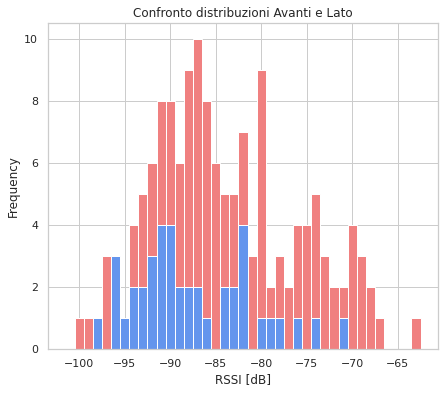

[7473402457974956539]
[4723377902654971775]


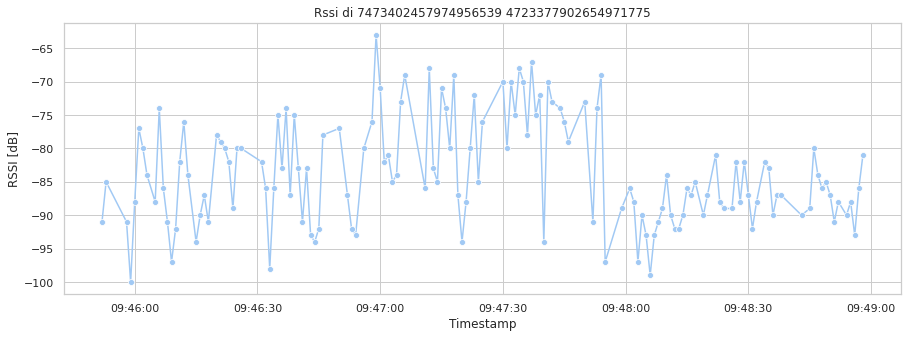

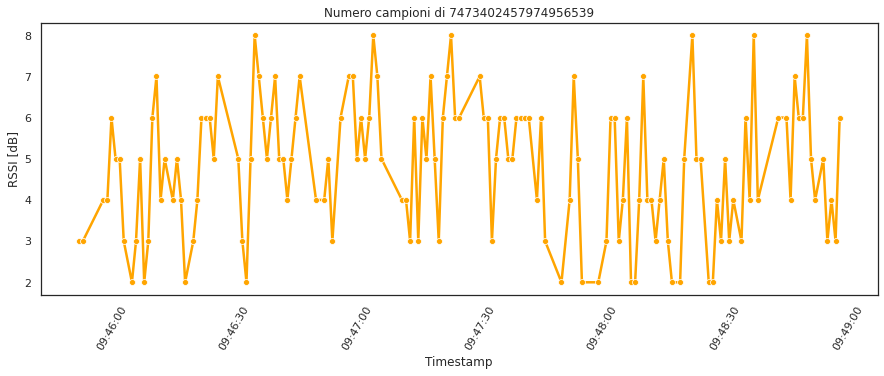

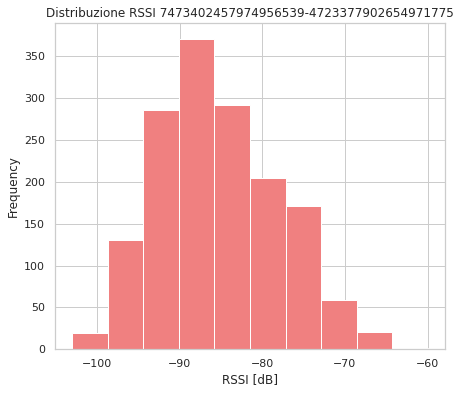

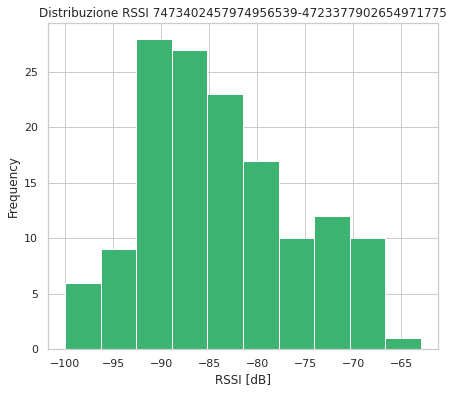

---------------------------
Ttest_indResult(statistic=1.3762925587437937, pvalue=0.17030141847813185)


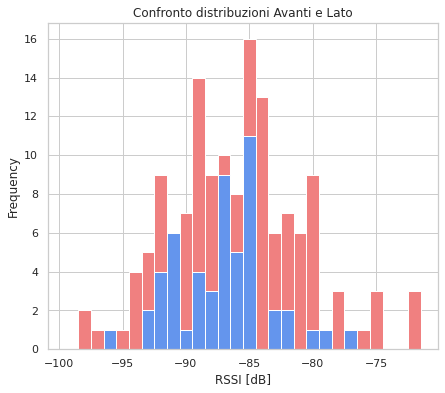

[7473402457974956539]
[7131565301232367964]


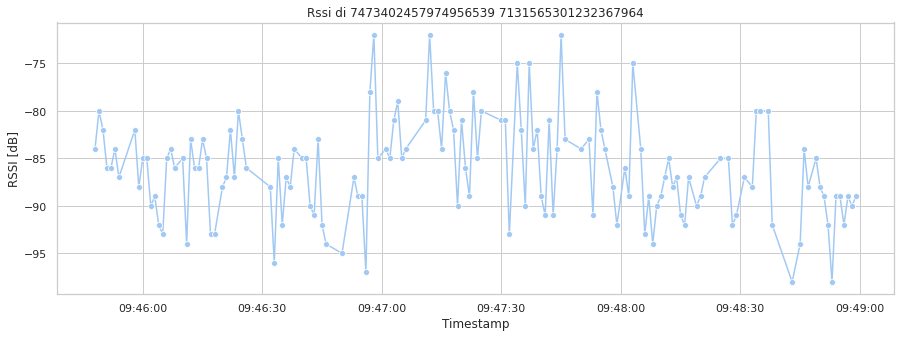

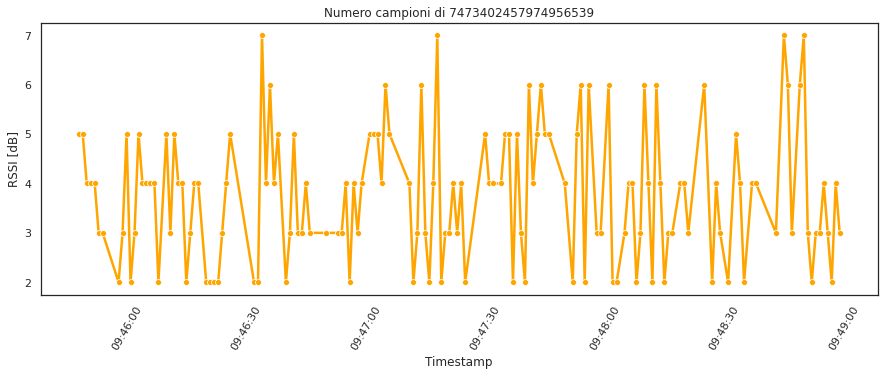

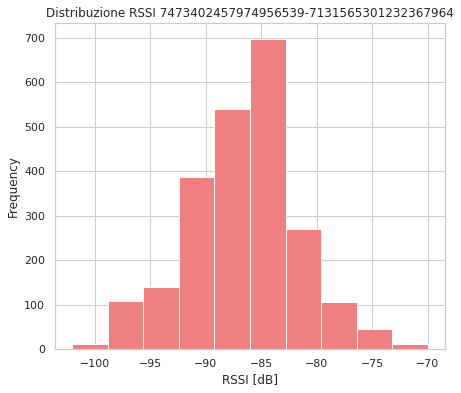

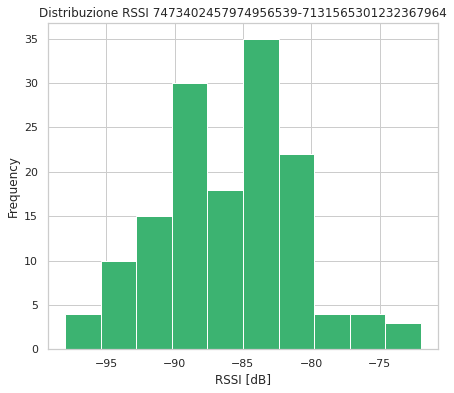

---------------------------


In [21]:
f1 = "test2"
#anal_half(f1, 7473402457974956539, 4723377902654971775)
couples = decouple_file(f1)
i = 0
for c in couples:
    #print(c.describe(), flush=True)
    #c.describe().to_csv("data" + str(i) + ".csv")
    z = elaborate_dataset(c)
    
    
    a = get_subdf(z,1)
    b = get_subdf(z,2)
   
    
    if len(a) == 0 or len(b) == 0:
        continue
    
    
    
    tests_with_pvalue2(a,b)
    
    scan = a.scanner.unique() #tutti gli scanner
    adv = a.advertiser.unique() #tutti gli advertiser
    print(scan, flush=True)
    print(adv, flush=True)
    create_linear_rssi_samples_vs_time_graph(a)
    plt.figure(figsize=(7,6))
    sns.set_context("notebook", font_scale=1.3)
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.xlabel('RSSI [dB]')
    scanner = str(list(c['scanner'])[0]) 
    adv = str(list(c['advertiser'])[0]) 
    plt.title("Distribuzione RSSI " + scanner +"-" +adv)
    c.rssi.plot.hist(color="lightcoral")
    plt.show()
    plt.figure(figsize=(7,6))
    sns.set_context("notebook", font_scale=1.3)
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.xlabel('RSSI [dB]')
    scanner = str(list(c['scanner'])[0]) 
    adv = str(list(c['advertiser'])[0]) 
    plt.title("Distribuzione RSSI " + scanner +"-" +adv)
    a.rssi.plot.hist(color="mediumseagreen")
    plt.show()
    print("---------------------------", flush=True)
    i+=1

#f2 = "poc_casa_2m"
#couples = decouple_file(f2)
#for c in couples:
#    print(c.describe(), flush=True)
#    z = elaborate_dataset(c)
#    create_linear_rssi_samples_vs_time_graph(z)
#print("---------------------------")
#IL 414 è LG invece 171 è XIAOMI
#f3 = "poc_casa_3m"
#couples = decouple_file(f3)
#for c in couples:
#    print(c.describe(), flush=True)
#    z = elaborate_dataset(c)
#    create_linear_rssi_samples_vs_time_graph(z)
#print("---------------------------")

#tests_with_pvalue()


#file = "poc_casa_1to3m"
#couples = decouple_file(file)
#for c in couples:
    #print(c.describe())
#    z = elaborate_dataset(c)
#    create_linear_rssi_samples_vs_time_graph(z)
#make_sync(couples)

#tests_with_pvalue()